# Segmenting GPS track

This section presents the problem of segmenting a GPS track based on discrete-value criteria or spatiotemporal criteria. We have had a brief preview of this treatment in the quickstart use case. Indeed, in the GPS track corresponding to an athletics training, we segment the trajectory depending on the shifting the speed of his running.

## First we set our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt

import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Loading GPS track data

Data represents a winding track from a itinerary (identifier N°903959).

-------------------------------------
GPS track #0 of user 903959:
-------------------------------------
  Nb of pt(s):   251
  Ref sys id   : ENU
  Starting at  : 01/01/1970 00:00:00
  Ending at    : 01/01/1970 00:00:00
  Duration     :   0.000 s
  Length       : 1211.567 m
-------------------------------------



<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

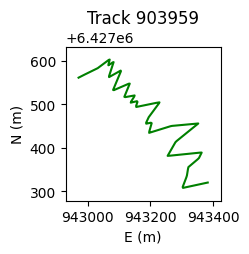

In [2]:
from tracklib.io.TrackReader import TrackReader
import tracklib.algo.Interpolation as interpolation
import tracklib.plot.Plot as Plot

csvpath = '../../../data/lacet/ecrins.csv'
tracks = TrackReader.readFromWkt(csvpath, 0, 1, 2, ",", 1, "ENUCoords", None, True)

trace = tracks["903959","%"][0]
trace.resample(5, interpolation.MODE_SPATIAL)

traceE = trace.extract(450, 700)
traceE.summary()

plt.figure(figsize = (2,2))
traceE.plot(append = True, sym='g-', label='original extract track 3')


## First basic method, with table index

Tout simplement, vous avez la liste des index des observations qui représentent les limites des différents fragments de la trace.

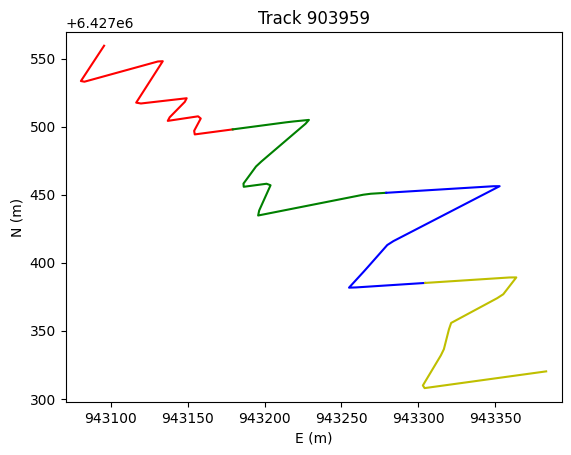

In [3]:
from tracklib.algo.Segmentation import split
import matplotlib.pyplot as plt

idxFragments = [50, 100, 150, 200, 250]
collection = split(traceE, idxFragments)

COLORS = ['r-','g-','b-','y-','m-','c-']
for i in range(len(collection)):
    collection[i].plot(COLORS[i%6], append=True)

plt.xlim([collection.bbox().getLowerLeft().getX()-10,collection.bbox().getUpperRight().getX()+10])
plt.ylim([collection.bbox().getLowerLeft().getY()-10,collection.bbox().getUpperRight().getY()+10])
plt.show()

## Segmenting under any of these AF or any combination of these AF


### Step 1: create criteria as Analytical Feature

Vous n'avez pas les bornes pour la segmenter mais vous avez une méthode pour les calculer. Autrement dit, vous avez un critère permettant 
de découper la trace. Comme par exemple, la trace du quickstart qui a été découpée suivant les changements de vitesses. 

Pour cela, il faut tout d'abord créer des points de rupture, ils seront définis par un AF qui aura un ensemble fini de valeurs. 
Une coupure sera effective à chaque seuil passé en paramètre.

Vous pouvez même combiner plusieurs AF pour découper la trace. Par défaut l'opérateur de comparaison est AND mais on peut le changer en OU.
Dans ce cas, l'ensemble des AF sont définis dans un tableau ainsi que leurs seuils.

A l'issu de la création des marqueurs, la trace est toujours conservée, mais une nouvelle AF est ajoutée. 
Elle a comme valeurs 0 sauf pour les ruptures, ce sera 1.








In [4]:
from tracklib.algo.Segmentation import segmentation

segmentation(track, ["absdv", "heading"], "speed_decoup", [1.5, 0], MODE_COMPARAISON_OR)

NameError: name 'track' is not defined

### Step 2: split under any of these AF or any combination of these AF

Il reste à découper la trace suivant le marker créé précédemment. Pour cela, il faut appeler la même fonction **split** mais en spécifiant cette fois-ci
non pas une liste des index, mais le ou les AF


Splits track according to af name (considered as a marker) 


Return: No track if no segmentation, otherwise a TrackCollection object

In [ ]:
TRACES = split(trace, "decoup3")